In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised = True)

train_data, test_data = imdb['train'],imdb['test']

Shuffling and writing examples to /home/shabthi/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4ZXB92/imdb_reviews-train.tfrecord


Shuffling and writing examples to /home/shabthi/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4ZXB92/imdb_reviews-test.tfrecord


Shuffling and writing examples to /home/shabthi/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete4ZXB92/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /home/shabthi/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [ ]:
print(tokenizer.subwords)

In [9]:
sample_string = "welcome to nlp course!!"

tokenize_string = tokenizer.encode(sample_string)
print(tokenize_string)

original_string = tokenizer.decode(tokenize_string)
print(original_string)

[6351, 7961, 7, 8039, 6250, 7961, 653, 2814]
welcome to nlp course!!


In [10]:
for i in tokenize_string:
    print("{} ---> {}".format(i, tokenizer.decode([i])))

6351 ---> welcome
7961 --->  
7 ---> to 
8039 ---> n
6250 ---> lp
7961 --->  
653 ---> course
2814 ---> !!


In [11]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 10

train_data = train_data.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
test_data = test_data.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)



Epoch 1/10
25000/25000 [==============================] - 604s 24ms/step - loss: 0.6868 - accuracy: 0.5229 - val_loss: 0.6866 - val_accuracy: 0.5293
Epoch 2/10
25000/25000 [==============================] - 468s 19ms/step - loss: 0.6842 - accuracy: 0.5356 - val_loss: 0.6858 - val_accuracy: 0.5345
Epoch 3/10
25000/25000 [==============================] - 428s 17ms/step - loss: 0.6830 - accuracy: 0.5416 - val_loss: 0.6859 - val_accuracy: 0.5370
Epoch 4/10
25000/25000 [==============================] - 410s 16ms/step - loss: 0.6822 - accuracy: 0.5437 - val_loss: 0.6862 - val_accuracy: 0.5378
Epoch 5/10
25000/25000 [==============================] - 405s 16ms/step - loss: 0.6816 - accuracy: 0.5455 - val_loss: 0.6863 - val_accuracy: 0.5380
Epoch 6/10
25000/25000 [==============================] - 402s 16ms/step - loss: 0.6813 - accuracy: 0.5464 - val_loss: 0.6866 - val_accuracy: 0.5373
Epoch 7/10
25000/25000 [==============================] - 398s 16ms/step - loss: 0.6811 - accuracy: 0.5469

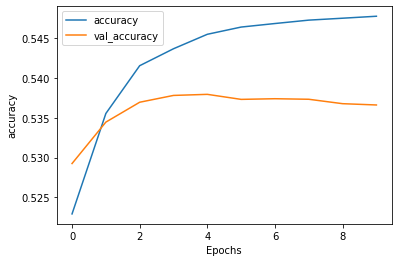

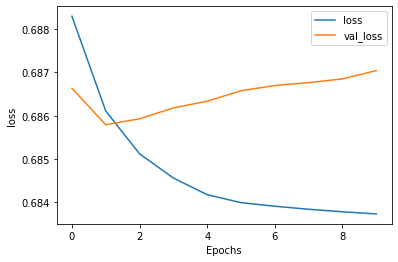

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [25]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


NameError: name 'files' is not defined